In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sympy import symbols, Eq, solve, lambdify
from mpl_toolkits.mplot3d import Axes3D

Describe the level surfaces of the given functions of three variables. 

$f(x,y,z) = x^2 + y^2 + z^2$

$f(x,y,z) = z − x^2 + y^2$

$f(x,y,z) = \frac{x^2 + y^2}{z}$

$f(x,y,z) = \frac{z}{x − y}$

In [2]:
def plot_level_surface(f, c, x_range = (-1, 1), y_range = (-1, 1)):

    # Rearrange the equation to solve for z
    x, y, z = symbols('x y z')
    z_expr = solve(Eq(f, c), z)

    # Handle cases with multiple roots
    if len(z_expr) > 1:
        z_expr = z_expr[0]
        negative_required = True
    else:
        negative_required = False

    # Convert to function for evaluation
    z_func = lambdify((x, y), z_expr)

    # Create a grid of x and y values
    x_vals = np.linspace(*x_range, 100)
    y_vals = np.linspace(*y_range, 100)
    x_vals, y_vals = np.meshgrid(x_vals, y_vals)

    # Calculate z values
    z_vals = z_func(x_vals, y_vals)
    if len(z_vals) == 1:
        z_vals = z_vals[0]

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x_vals, y_vals, z_vals, alpha = 0.5)
    if negative_required:
        ax.plot_surface(x_vals, y_vals, -z_vals, alpha = 0.5)
    
    plt.show()

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in sqrt
  return -sqrt(-x**2 - y**2 + 1)


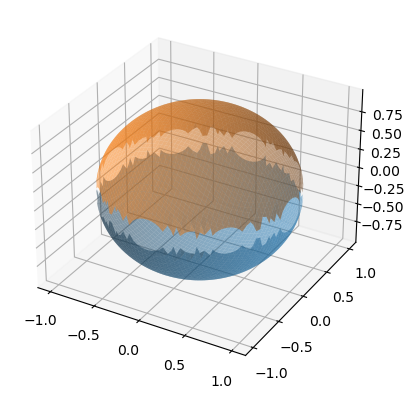

In [3]:
x, y, z = symbols('x y z')
f = x**2 + y**2 + z**2
plot_level_surface(f, 1, (-1, 1), (-1, 1))

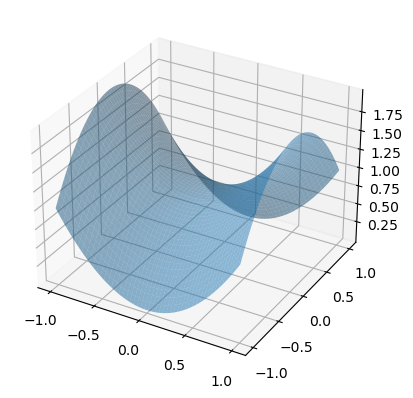

In [4]:
f = z - x**2 + y**2
plot_level_surface(f = f, c = 1, x_range = (-1, 1), y_range = (-1, 1))

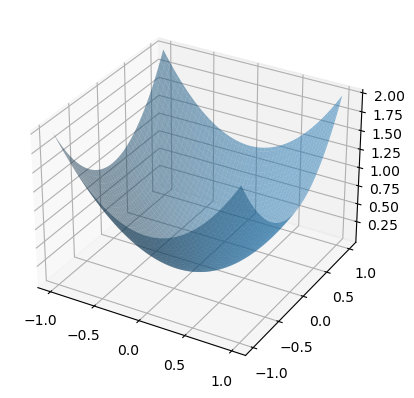

In [5]:
f = (x**2 + y**2) / z
plot_level_surface(f = f, c = 1, x_range = (-1, 1), y_range = (-1, 1))

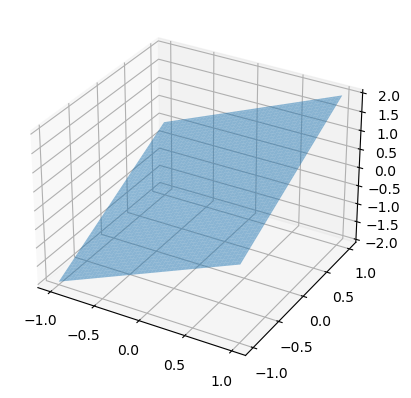

In [6]:
f = z / (x + y)
plot_level_surface(f = f, c = 1, x_range = (-1, 1), y_range = (-1, 1))